In [ ]:
# prompt: load mnist dataset

import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# You can now work with x_train, y_train, x_test, and y_test
# For example, print the shape of the training data:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)


In [ ]:
# prompt: load in df

import pandas as pd
import numpy as np

# Assuming x_train and y_train are already defined from the previous code.

# Create a DataFrame from the training data (x_train)
df = pd.DataFrame(x_train.reshape(x_train.shape[0], -1))

# Add y_train as a new column to the DataFrame
df['label'] = y_train

# The following lines convert the data to a CSV format and display it.
# The CSV conversion is just an example and may not be needed for your specific task.

# Convert the DataFrame to CSV string
# csv_data = df_x.to_csv(index=False)
# print(csv_data)


# Optional: Display first few rows
print(df.head())


   0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   783  label  
0    0      5  
1    0      0  
2    0      4  
3    0      1  
4    0      9  

[5 rows x 785 columns]


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [ ]:
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
59373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
19457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
42645,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
13350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [ ]:
# prompt: show unique target

import numpy as np
print(np.unique(y_train))


[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# prompt: train a neural network with 2 hidden layers for mnist dataset

import tensorflow as tf
import pandas as pd
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'), # First hidden layer
  tf.keras.layers.Dense(64, activation='relu'),  # Second hidden layer
  tf.keras.layers.Dense(10) # Output layer with 10 units (one for each digit)
])

# Define the loss function and optimizer
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5) # You can adjust the number of epochs

# Evaluate the model
model.evaluate(x_test,  y_test, verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8739 - loss: 0.4338
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9679 - loss: 0.1061
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9780 - loss: 0.0693
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9827 - loss: 0.0519
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9856 - loss: 0.0448
313/313 - 1s - 2ms/step - accuracy: 0.9788 - loss: 0.0729


[0.07286935299634933, 0.9787999987602234]

In [ ]:
# prompt: Separate features (X) and target (y)

import tensorflow as tf
import pandas as pd

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# X_train and y_train are already defined in your provided code
# separate features (X) and target (y)
X = x_train
y = y_train

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (60000, 28, 28)
Shape of y: (60000,)


In [ ]:
# prompt: Split data into training and testing sets

from sklearn.model_selection import train_test_split

# Assuming X and y are defined from the previous code
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% validation

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)


Shape of X_train: (48000, 28, 28)
Shape of y_train: (48000,)
Shape of X_val: (12000, 28, 28)
Shape of y_val: (12000,)


In [ ]:
# prompt: Scale the data

import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data for scaling
x_train_reshaped = x_train.reshape(x_train.shape[0], -1)
x_test_reshaped = x_test.reshape(x_test.shape[0], -1)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
x_train_scaled = scaler.fit_transform(x_train_reshaped)

# Transform the test data using the same scaler
x_test_scaled = scaler.transform(x_test_reshaped)

# Reshape back to original dimensions
x_train_scaled = x_train_scaled.reshape(x_train.shape)
x_test_scaled = x_test_scaled.reshape(x_test.shape)


# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'), # First hidden layer
  tf.keras.layers.Dense(64, activation='relu'),  # Second hidden layer
  tf.keras.layers.Dense(10) # Output layer with 10 units (one for each digit)
])

# Define the loss function and optimizer
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

# Train the model
model.fit(x_train_scaled, y_train, epochs=5) # You can adjust the number of epochs

# Evaluate the model
model.evaluate(x_test_scaled,  y_test, verbose=2)

# Assuming X and y are defined from the previous code
X = x_train_scaled
y = y_train

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% validation

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8877 - loss: 0.3754
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9711 - loss: 0.0952
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9813 - loss: 0.0621
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9849 - loss: 0.0479
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9874 - loss: 0.0387
313/313 - 1s - 3ms/step - accuracy: 0.9703 - loss: 0.1373
Shape of X: (60000, 28, 28)
Shape of y: (60000,)
Shape of X_train: (48000, 28, 28)
Shape of y_train: (48000,)
Shape of X_val: (12000, 28, 28)
Shape of y_val: (12000,)


In [ ]:
# prompt: Make predictions and Evaluate the model and show its classification report

from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = model.predict(x_test_scaled)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the classification report
print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.95      0.98      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.95      0.96       892
           6       0.97      0.97      0.97       958
           7       0.96      0.98      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



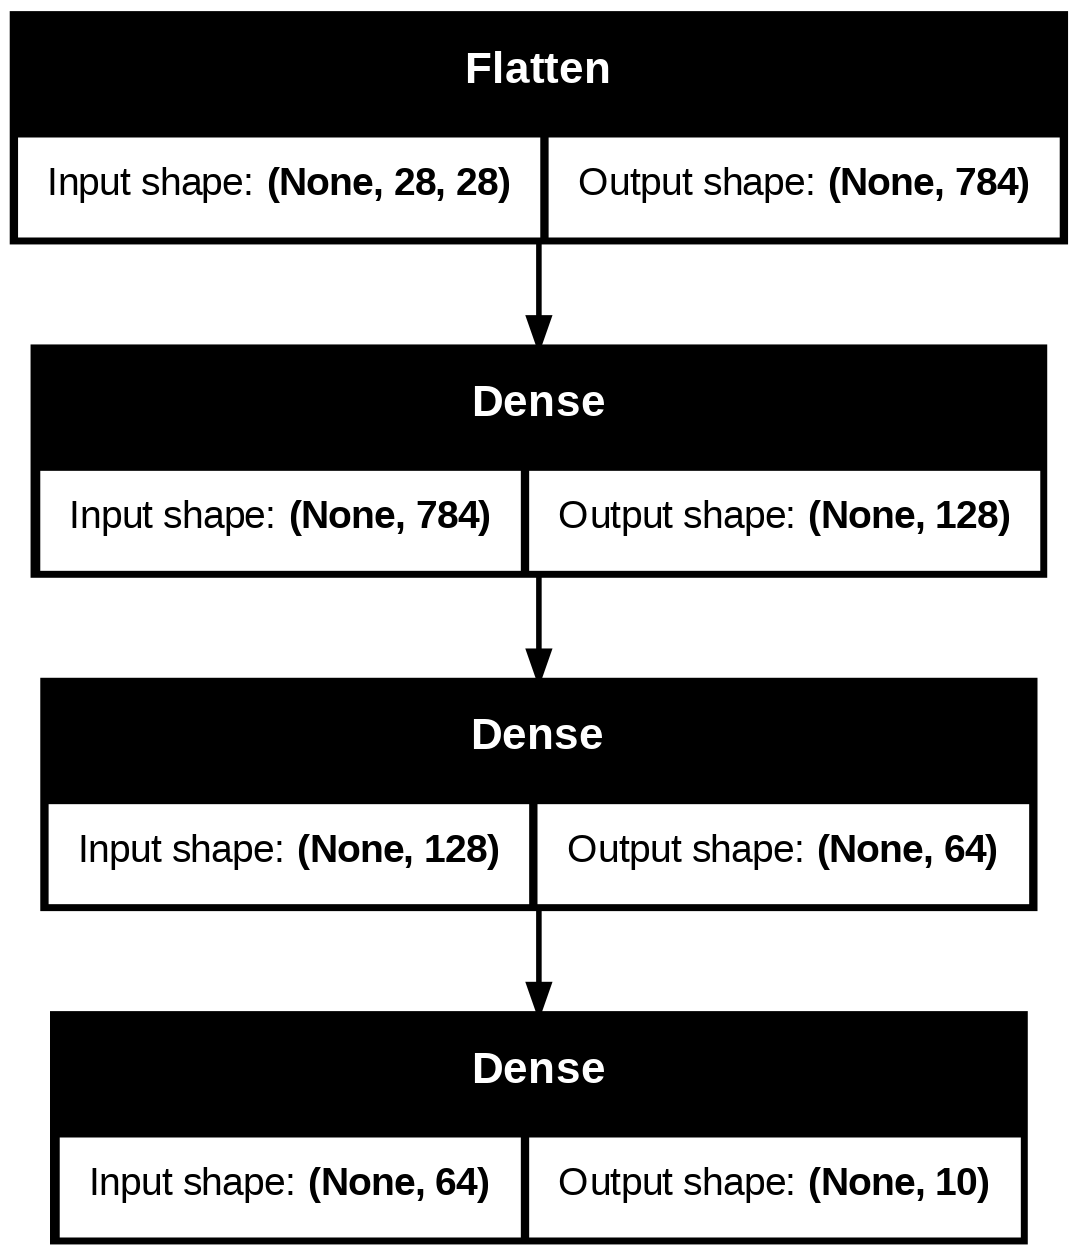

In [ ]:
# prompt: display the neural network created above

import tensorflow as tf

tf.keras.utils.plot_model(model, show_shapes=True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


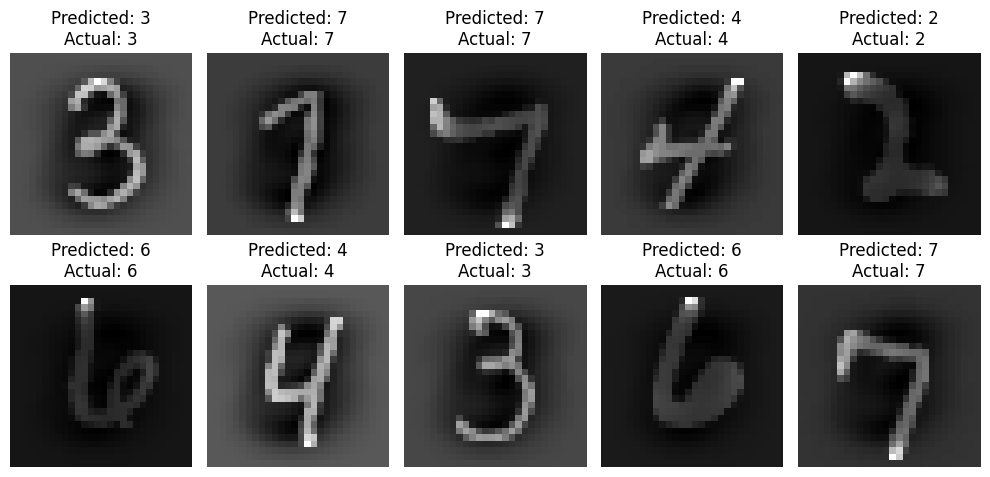

In [ ]:
# prompt: pick 10 test sample images and show result with my neural network

import matplotlib.pyplot as plt
import numpy as np

# Assuming x_test_scaled and y_test are defined from the previous code
# and model is the trained model

# Select 10 random samples from the test set
num_samples = 10
random_indices = np.random.choice(len(x_test_scaled), size=num_samples, replace=False)
sample_images = x_test_scaled[random_indices]
sample_labels = y_test[random_indices]

# Make predictions on the sample images
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Display the images and predictions
plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}\nActual: {sample_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# prompt: apply cnn

import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Reshape and normalize the data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255

# Define the CNN model
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=2, batch_size=32) # Reduced epochs for demonstration

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.8931 - loss: 0.3534
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 29ms/step - accuracy: 0.9825 - loss: 0.0561
Test loss: 0.0489
Test accuracy: 0.9852


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.8814 - loss: 0.3955
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9811 - loss: 0.0604
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 28ms/step - accuracy: 0.9854 - loss: 0.0464
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 27ms/step - accuracy: 0.9894 - loss: 0.0361
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9912 - loss: 0.0282
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9923 - loss: 0.0235
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 29ms/step - accuracy: 0.9944 - loss: 0.0196
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9947 - loss: 0.0161
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9957 - loss: 0.0142
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9967 - loss: 0.0110


Saving download (1).png to download (1).png
User uploaded file 'download (1).png'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted digit for download (1).png: 2


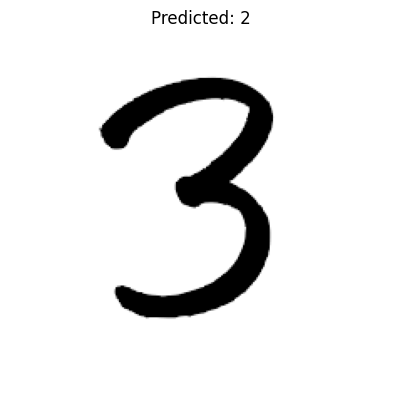

In [ ]:
# prompt: upload image from files and load and normalize the image and predict based on training with cnn and show result

from google.colab import files
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras

# Load the trained CNN model (assuming it's already trained and named 'model')
# ... (your existing code to load the trained CNN model)
# Example using the previously defined model
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.AveragePooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32)


def predict_image(image_path):
    try:
        img = Image.open(image_path).convert('L')  # Convert to grayscale
        img = img.resize((28, 28))  # Resize to 28x28
        img_array = np.array(img)
        img_array = img_array.reshape(1, 28, 28, 1).astype("float32") / 255
        prediction = model.predict(img_array)
        predicted_label = np.argmax(prediction)
        return predicted_label
    except Exception as e:
        print(f"Error processing image: {e}")
        return None


uploaded = files.upload()
for fn in uploaded.keys():
    print(f"User uploaded file '{fn}'")
    predicted_label = predict_image(fn)

    if predicted_label is not None:
      print(f"Predicted digit for {fn}: {predicted_label}")
      img = Image.open(fn)
      plt.imshow(img, cmap='gray')
      plt.title(f"Predicted: {predicted_label}")
      plt.axis('off')
      plt.show()